# EDA on Haberman's Survival Dataset

In [10]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [11]:
#loading the dataset and checking the head

cancer = pd.read_csv('https://raw.githubusercontent.com/Uthmanic/Haberman/master/haberman.csv')
print(cancer.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [12]:
#shape of the data(number of data-points and features)

print(cancer.shape)

(306, 4)


In [13]:
# name of the 4 columns

print(cancer.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [14]:
#number of data-points for each status 
#1 = the patient survived 5 years or longer
#2 = the patient died within 5 year
#is the dataset balanced or imbalanced?

cancer['status'].value_counts()

#the cancer dataset is imbalanced as the data-points
#for status 1 =(225) and 2 =(81) are not equal/far apart

1    225
2     81
Name: status, dtype: int64

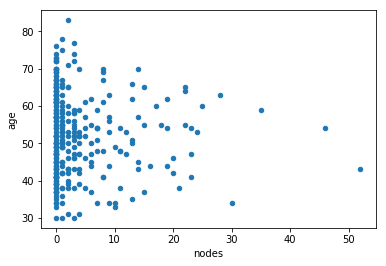

In [15]:
#2-D scatter plot

cancer.plot(kind='scatter',x='nodes',y='age')
plt.show()

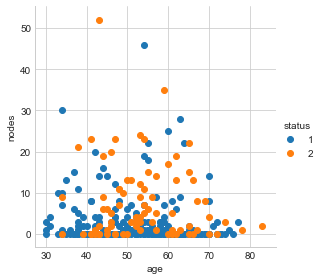

In [16]:
#2-D scatter plot with color-coding for age and nodes

sns.set_style('whitegrid')
sns.FacetGrid(cancer, hue='status',size=4)\
    .map(plt.scatter,'age','nodes')\
    .add_legend()
plt.show()

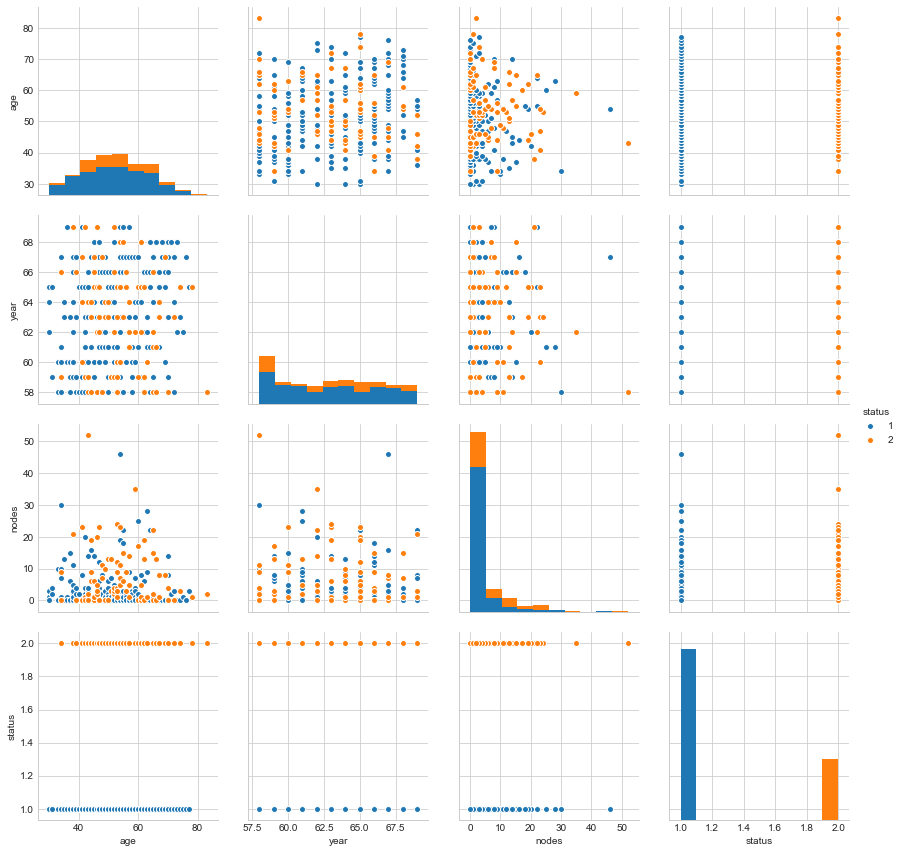

In [17]:
#plotting a pairplot to see any relationship with respect 
#to the target class(status)

plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="status", size=3);
plt.show()

#from the plot below,we can't really say which features is the
#most useful as the data-points are not linearly separated

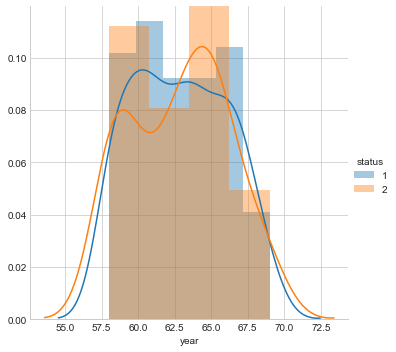

In [18]:
#performing a univariate analysis on the three independent 
#features to check for useful info.

#univariate analysis plot for 'year' feature
sns.FacetGrid(cancer, hue="status", size=5) \
    .map(sns.distplot, "year") \
    .add_legend();
plt.show();

#from the plot, the 'year' feature is considered not useful
#(the two classes 1 and 2 are heavily overlapped)

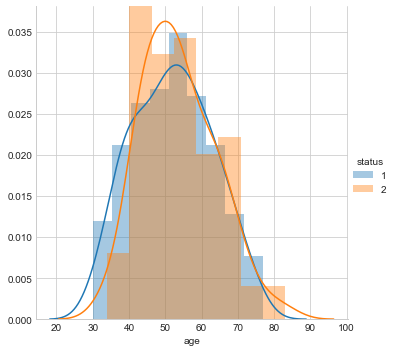

In [19]:
#univariate analysis plot for 'age' feature
sns.FacetGrid(cancer, hue="status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend();
plt.show();

#from the plot, the 'age' feature is considered not useful
#(the two classes 1 and 2 are overlapped(almost on top of each other))

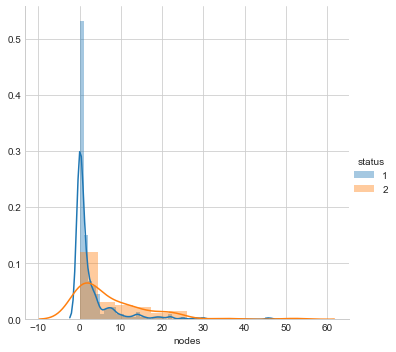

In [20]:
#univariate analysis plot for 'nodes' feature

sns.FacetGrid(cancer, hue="status", size=5) \
    .map(sns.distplot, "nodes") \
    .add_legend();
plt.show();

#out of the three plot,it is clear that the 'nodes' feature is
#more useful than the rest since;
#there is a lesser overlap and classifying results based on
#this feature is more promising than the rest

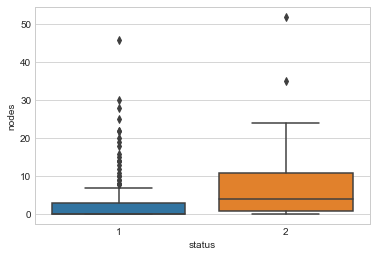

In [21]:
#plotting a boxplot on the 'nodes' feature for a more clearer insight
sns.boxplot(x='status',y='nodes', data=cancer)
plt.show()

#the plot below shows that, 75th percentile of patients who 
#srvived more han five years has numbers of nodes less than 5

# and 5th percentile of patients who died within 5 years has 
#umber of nodes greater than the 75th percentile of the survived class

In [22]:
#OBSERVATION
# 1)From the analysis carried out, it is cleared that the 'nodes'
#feature is the most useful out of the three features.

#2)Although,the 'nodes' feature has some overlaps in the status
#class, it is certain based on the observations
# that, patient with nodes less than 5 can be classify as those
# who will survive more than 5 years after surgery.